**Brian Blaylock**  
**November 1, 2018**

# GOES-16 Sandbox

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_GOES.get_ABI import files_on_pando, file_nearest, get_GOES_FireTemperature, get_GOES_TrueColor
from BB_maps.my_basemap import draw_centermap, draw_HRRR_map, draw_GOES_East_geo
from BB_data.active_fires import get_fires

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12,8]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 300

Makes some maps

In [2]:
# Geostationary CONUS
g = draw_GOES_East_geo()

In [3]:
# HRRR Domain
m = draw_HRRR_map()

In [4]:
# Western USA
w = draw_centermap(lat=40, lon=-112, size=[10,12])

In [5]:
# Utah
u = draw_centermap(lat=40, lon=-112, size=[4,4])

In [44]:
# custom
c = draw_centermap(lat=40, lon=-109.5, size=[4,7.5])

Specify the range of dates

In [6]:
DATE = datetime(2018,9,14,0)

In [7]:
F = file_nearest(DATE)

In [16]:
TC = get_GOES_TrueColor(F)
FT = get_GOES_FireTemperature(F)

Fetching: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/ABI-L2-MCMIPC/20180914/OR_ABI-L2-MCMIPC-M3_G16_s20182570002128_e20182570004501_c20182570005014.nc
Scan Start    : 2018-09-14 00:02:12.800000
Scan midpoint : 2018-09-14 00:03:31.400000
Scan End      : 2018-09-14 00:04:50.100000
File Created  : 2018-09-14 00:05:01.400000
Scan Duration : 2.62 minutes
    Gamma correction, gamma= 2.2
    Contrast correction, contrast= 105

******************************************
 How to use color tuple with pcolormesh:
 >>> TC = get_GOES_TrueColor(FILE)
 >>> newmap = plt.pcolormesh(TC['lon'], TC['lat'], np.zeros_like(TC['lon']), color=TC['TrueColor Tuple'], linewidth=0)
 >>> newmap.set_array(None)
******************************************

Fetching: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/ABI-L2-MCMIPC/20180914/OR_ABI-L2-MCMIPC-M3_G16_s20182570002128_e20182570004501_c20182570005014.nc
Scan Start    : 2018-09-14 00:02:12.800000
Scan midpoint : 2018-09-14 00:03:31.40000

In [21]:
color = np.nanmax([TC['TrueColor Tuple'], FT['FireTemperature Tuple']], axis=0)

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: All-NaN axis encountered
  """Entry point for launching an IPython kernel.


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:251: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:251: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


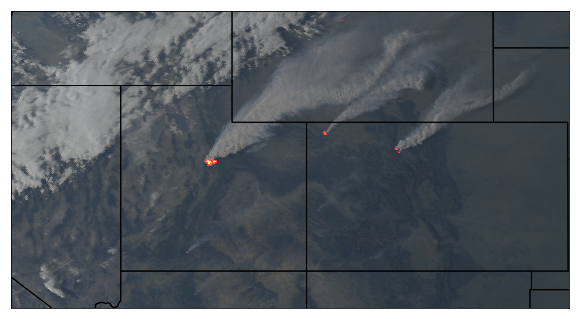

In [45]:
plt.figure(figsize=[10,10])
newmap = c.pcolormesh(TC['lon'], TC['lat'], np.zeros_like(TC['lon']), color=color, linewidth=0)
newmap.set_array(None)

c.drawstates(color='k', linewidth=1)
#u.drawcounties(color='grey', linewidth=.5)

plt.savefig('./figs/polecreek', bbox_inches='tight', dpi=300)

In [59]:
fires = get_fires(DATE, min_size=500)

Got fire data from Active Fire Mapping Program: https://fsapps.nwcg.gov/afm/data/lg_fire/lg_fire_info_2018-09-14.txt


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:251: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:251: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


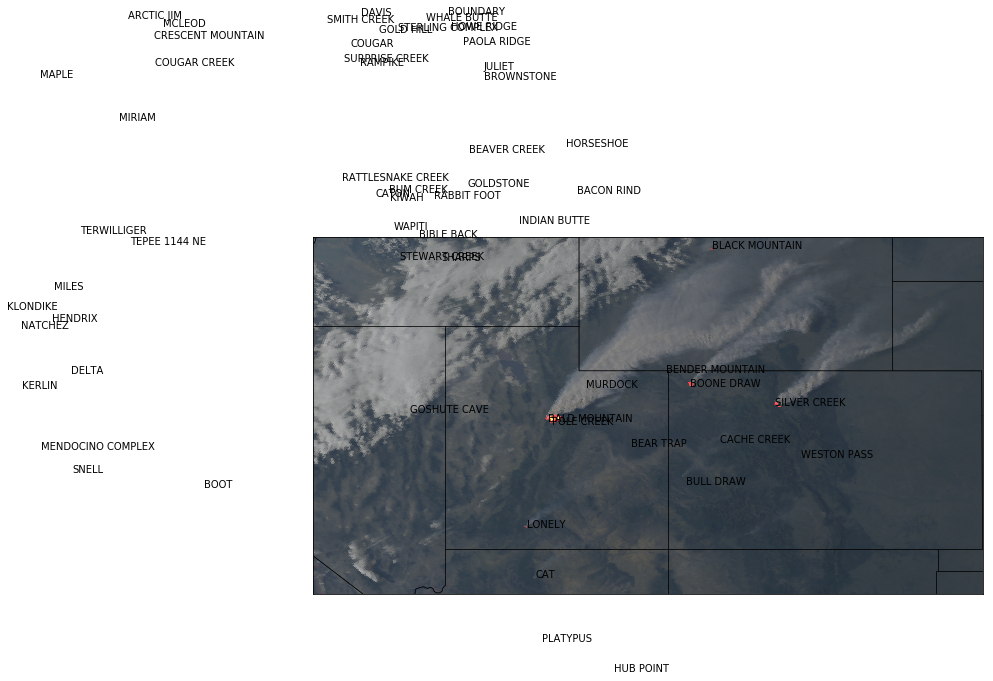

In [60]:
for f in fires['FIRES'].keys():
    z = fires['FIRES'][f]
    c.scatter(z['LON'], z['LAT'])
    plt.text(z['LON'], z['LAT'], f)

newmap = c.pcolormesh(TC['lon'], TC['lat'], np.zeros_like(TC['lon']), color=color, linewidth=0)
newmap.set_array(None)

c.drawstates()

In [63]:
#np.save('GOES_ABI_2km_latlon', {'lat':TC['lat'],'lon':TC['lon']})